# Assignment #3 - Training
## Convolutional Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

### Import AffNIST Dataset

In [1]:
from assignment_1.dataset import AffnistDataset

affnist_dataset = AffnistDataset(
    training_data_path="../assignment_1/data/processed/affnist/training_batches",
    test_data_path="../assignment_1/data/processed/affnist/test_batches",
)
X_train, X_test, y_train, y_test = (
    affnist_dataset.X_train,
    affnist_dataset.X_test,
    affnist_dataset.y_train,
    affnist_dataset.y_test,
)

X_train = X_train.reshape(X_train.shape[0], 1, 40, 40)
X_test = X_test.reshape(X_test.shape[0], 1, 40, 40)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 1, 40, 40), (10000, 1, 40, 40), (50000,), (10000,))

### Plot samples from the Fashion MNIST dataset

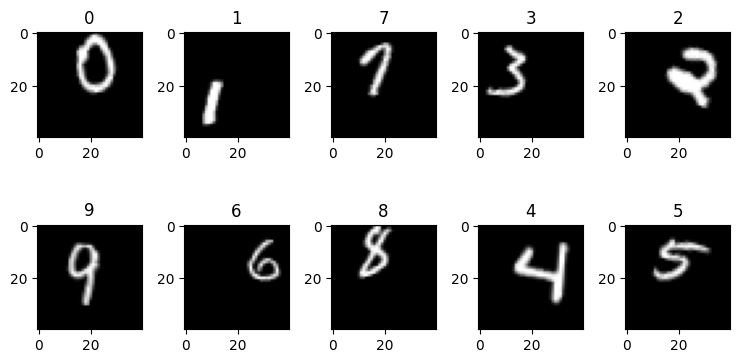

In [2]:
from assignment_3.utils.plot import plot_samples

plot_samples(X_train, y_train, shape=(40, 40))

## Train multiple convolutional autoencoders with different hyperparameters

### Autoencoder 1
#### Model:
- **convolutional layers:** 2
- **batch size:** 128
- **epochs:** 500
- **learning rate:** 0.01
- **shuffle batches:** true

In [3]:
from assignment_3.layers import ConvLayer, MaxPoolLayer, DenseLayer, ReshapeLayer
from assignment_3.utils.weights import HeWeightInitializer
from assignment_3.networks import Autoencoder
from assignment_3.utils.activation_functions import ReLUActivation


layers = [
    ConvLayer(
        channels_in=1,
        channels_out=8,
        kernel_size=3,
        activation_function=ReLUActivation(),
    ),
    MaxPoolLayer(pool_size=2, stride=2),
    ConvLayer(
        channels_in=8,
        channels_out=16,
        kernel_size=3,
        activation_function=ReLUActivation(),
    ),
    MaxPoolLayer(pool_size=2, stride=2),
    ReshapeLayer(),
    DenseLayer(
        input_dim=16 * 8 * 8,
        num_of_neurons=128,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DenseLayer(
        input_dim=128,
        num_of_neurons=1600,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]

autoencoder = Autoencoder(layers)

In [4]:
from assignment_3.utils.optimizers import MiniBatchOptimizer
from assignment_3.utils.loss_functions import MeanSquaredError

autoencoder_optimizer = MiniBatchOptimizer(
    autoencoder,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=100,
    learning_rate=0.01,
    shuffle=True,
)
autoencoder_optimizer.optimize(X_train, X_train.reshape(X_train.shape[0], 1600))

Started optimization of Autoencoder, classification=False
Epoch 1  --  accuracy 0.6194238 - loss 0.0000028
Epoch 2  --  accuracy 0.6403418 - loss 0.0000022
Epoch 3  --  accuracy 0.6607422 - loss 0.0000019
Epoch 4  --  accuracy 0.6809229 - loss 0.0000016
Epoch 5  --  accuracy 0.7003906 - loss 0.0000014
Epoch 6  --  accuracy 0.7189502 - loss 0.0000013
Epoch 7  --  accuracy 0.7356787 - loss 0.0000012
Epoch 8  --  accuracy 0.7512988 - loss 0.0000011
Epoch 9  --  accuracy 0.7660352 - loss 0.0000011
Epoch 10  --  accuracy 0.7790088 - loss 0.0000010
Epoch 11  --  accuracy 0.7908496 - loss 0.0000010
Epoch 12  --  accuracy 0.8013574 - loss 0.0000009
Epoch 13  --  accuracy 0.8109912 - loss 0.0000009
Epoch 14  --  accuracy 0.8200439 - loss 0.0000009
Epoch 15  --  accuracy 0.8280469 - loss 0.0000009
Epoch 16  --  accuracy 0.8349609 - loss 0.0000009
Epoch 17  --  accuracy 0.8415234 - loss 0.0000009
Epoch 18  --  accuracy 0.8473730 - loss 0.0000008
Epoch 19  --  accuracy 0.8525977 - loss 0.0000008
E

KeyboardInterrupt: 

In [5]:
from assignment_3.utils.pickle import dump_pickle

dump_pickle("pickles/autoencoder.pickle", autoencoder)
dump_pickle("pickles/autoencoder_optimizer.pickle", autoencoder_optimizer)

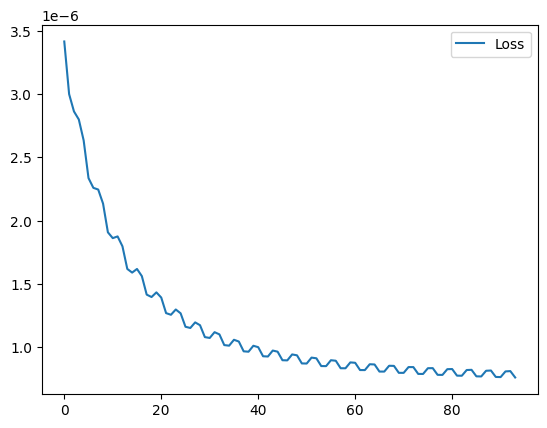

In [6]:
import matplotlib.pyplot as plt

plt.plot(autoencoder_optimizer.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

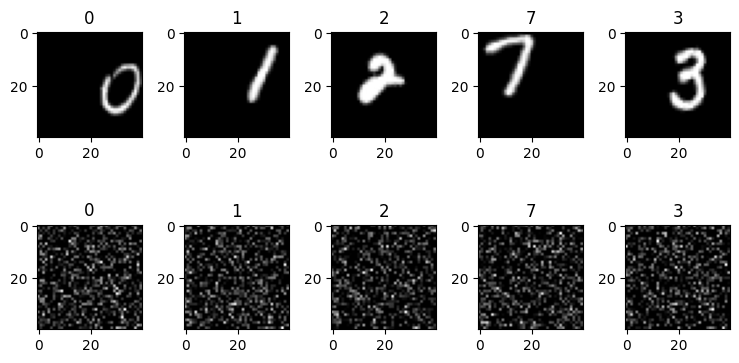

In [7]:
from assignment_3.utils.plot import plot_original_and_reconstructed

X_reconstructed = autoencoder.forward(X_test)
plot_original_and_reconstructed(X_test, X_reconstructed, y_test, shape=(40, 40))